# Task 3 - Experience Analytics

In this notebook, we want to evaluate the user experience of the customer

In [14]:
# Importation of the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

In [15]:
# Import the dataset
df = pd.read_csv("../data/Cleaned_Data.csv",na_values=['undefined',None])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 55 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   Bearer Id                                 149010 non-null  float64
 1   Start                                     150000 non-null  object 
 2   Start ms                                  150001 non-null  float64
 3   End                                       150000 non-null  object 
 4   End ms                                    150001 non-null  float64
 5   Dur. (s)                                  150001 non-null  float64
 6   IMSI                                      149431 non-null  float64
 7   MSISDN/Number                             148935 non-null  float64
 8   IMEI                                      149429 non-null  float64
 9   Last Location Name                        148848 non-null  object 
 10  Avg RTT DL (ms)     

In [113]:
df.groupby('MSISDN/Number')['MSISDN/Number'].count()

MSISDN/Number
3.360100e+10    1
3.360100e+10    1
3.360100e+10    1
3.360101e+10    1
3.360101e+10    2
               ..
3.379000e+10    1
3.379000e+10    1
3.197021e+12    1
3.370000e+14    1
8.823971e+14    1
Name: MSISDN/Number, Length: 106856, dtype: int64

In [16]:
dfTask3 = df[['MSISDN/Number', 'Avg RTT DL (ms)', 'Avg RTT UL (ms)', 
           'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)',
           'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)',
            'DL TP < 50 Kbps (%)', '50 Kbps < DL TP < 250 Kbps (%)',
                '250 Kbps < DL TP < 1 Mbps (%)', 'DL TP > 1 Mbps (%)',
                'UL TP < 10 Kbps (%)', '10 Kbps < UL TP < 50 Kbps (%)',
                '50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)',            
           'Handset Type']]
dfTask3[['MSISDN/Number']] = dfTask3[['MSISDN/Number']].astype(str).replace('nan',np.nan)
dfTask3.head(5)

,MSISDN/Number,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),DL TP < 50 Kbps (%),50 Kbps < DL TP < 250 Kbps (%),250 Kbps < DL TP < 1 Mbps (%),DL TP > 1 Mbps (%),UL TP < 10 Kbps (%),10 Kbps < UL TP < 50 Kbps (%),50 Kbps < UL TP < 300 Kbps (%),UL TP > 300 Kbps (%),Handset Type
0,33664962239.0,42.0,5.0,23.0,44.0,568730.0,20949.5,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,Samsung Galaxy A5 Sm-A520F
1,33681854413.0,65.0,5.0,16.0,26.0,568730.0,20949.5,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,Samsung Galaxy J5 (Sm-J530)
2,33760627129.0,45.0,5.0,6.0,9.0,568730.0,20949.5,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,Samsung Galaxy A8 (2018)
3,33750343200.0,45.0,5.0,44.0,44.0,568730.0,20949.5,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN
4,33699795932.0,45.0,5.0,6.0,9.0,568730.0,20949.5,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,Samsung Sm-G390F


In [17]:
# Function to calculate missing values by column
def missing_values_table(df):
    # Total missing values
    mis_val = df.isnull().sum()

    # Percentage of missing values
    mis_val_percent = 100 * df.isnull().sum() / len(df)

    # dtype of missing values
    mis_val_dtype = df.dtypes

    # Make a table with the results
    mis_val_table = pd.concat([mis_val, mis_val_percent, mis_val_dtype], axis=1)

    # Rename the columns
    mis_val_table_ren_columns = mis_val_table.rename(
    columns = {0 : 'Missing Values', 1 : '% of Total Values', 2: 'Dtype'})

    # Sort the table by percentage of missing descending
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
    '% of Total Values', ascending=False).round(1)

    # Print some summary information
    print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
        "There are " + str(mis_val_table_ren_columns.shape[0]) +
          " columns that have missing values.")

    # Return the dataframe with missing information
    return mis_val_table_ren_columns

In [30]:
# Check for missing values
missing_values_table(dfTask3)

Your selected dataframe has 19 columns.
There are 2 columns that have missing values.


,Missing Values,% of Total Values,Dtype
Handset Type,9559,6.4,object
MSISDN/Number,1066,0.7,object


In [35]:
# Fill NA of handset type with the mode
dfTask3['Handset Type'] = dfTask3['Handset Type'].fillna(dfTask3['Handset Type'].mode()[0])

In [37]:
missing_values_table(dfTask3)

Your selected dataframe has 19 columns.
There are 1 columns that have missing values.


,Missing Values,% of Total Values,Dtype
MSISDN/Number,1066,0.7,object


In [38]:
dfTask3["Total TCP"]=dfTask3['TCP DL Retrans. Vol (Bytes)']+ dfTask3['TCP UL Retrans. Vol (Bytes)']+dfTask3['TCP DL Retrans. Vol (Bytes)']+ dfTask3['TCP UL Retrans. Vol (Bytes)']
dfTask3["Total RTT"]=dfTask3['Avg RTT DL (ms)']+dfTask3['Avg RTT UL (ms)']
dfTask3["Total Throughput"]=dfTask3['DL TP < 50 Kbps (%)']+dfTask3['50 Kbps < DL TP < 250 Kbps (%)']+dfTask3['250 Kbps < DL TP < 1 Mbps (%)']+dfTask3['DL TP > 1 Mbps (%)']+dfTask3['UL TP < 10 Kbps (%)']+dfTask3['10 Kbps < UL TP < 50 Kbps (%)']+dfTask3['50 Kbps < UL TP < 300 Kbps (%)']+dfTask3['UL TP > 300 Kbps (%)']

In [42]:
dfExp = dfTask3.groupby('MSISDN/Number').agg({'Total TCP': 'mean',
                                              'Total RTT': 'mean',
                                              'Total Throughput': 'mean',
                                              'Handset Type': pd.Series.mode})

In [44]:
dfExp.rename(columns={'Total TCP':'Avg TCP','Total RTT':'Avg RTT','Total Throughput':'Avg Throughput'},inplace=True)
dfExp.columns

Index(['Avg TCP', 'Avg RTT', 'Avg Throughput', 'Handset Type'], dtype='object')

## **Task 3.2**

### a.	TCP values in the dataset

In [65]:
def compute_bound(df,column,ntop,ascending=False):
    valReturn = df[column].sort_values(ascending=ascending)
    return valReturn.head(ntop)

def compute_frequent(df,column,ntop):
    valReturn = df[column].value_counts()
    return valReturn.head(ntop)

In [66]:
# Top 10 AVG TCP
compute_bound(dfExp,'Avg TCP',10)

MSISDN/Number
33626320676.0    21228462.0
33614892860.0    20049103.0
33625779332.0    20049103.0
33659725664.0    18869744.0
33760536639.0    17690385.0
33675877202.0    17690385.0
33667163239.0    15331667.0
33627080969.0    14152308.0
33604515716.0    14152308.0
33786323068.0    14152308.0
Name: Avg TCP, dtype: float64

In [69]:
# Bottom 10 AVG TCP
compute_bound(dfExp,'Avg TCP',10,ascending=True)

MSISDN/Number
3197020876596.0    1179359.0
33667404293.0      1179359.0
33667403569.0      1179359.0
33667403521.0      1179359.0
33667401844.0      1179359.0
33667401521.0      1179359.0
33667401080.0      1179359.0
33667400826.0      1179359.0
33667400634.0      1179359.0
33667400078.0      1179359.0
Name: Avg TCP, dtype: float64

In [70]:
# Bottom 10 most frequent AVG TCP
compute_frequent(dfExp,'Avg TCP',10)

1179359.0     77731
2358718.0     21452
3538077.0      4422
4717436.0      1950
5896795.0       938
7076154.0       208
8255513.0        75
9434872.0        34
10614231.0       17
11793590.0       12
Name: Avg TCP, dtype: int64

### b.	RTT values in the dataset

In [71]:
# Top 10 AVG RTT
compute_bound(dfExp,'Avg RTT',10)

MSISDN/Number
33675877202.0    991.0
33761268199.0    839.0
33659822913.0    830.0
33659725664.0    782.0
33665530316.0    775.0
33760413819.0    767.0
33760536639.0    754.0
33614892860.0    730.0
33604515716.0    708.0
33627080969.0    702.0
Name: Avg RTT, dtype: float64

In [72]:
# Bottom 10 AVG RTT
compute_bound(dfExp,'Avg RTT',10,ascending=True)

MSISDN/Number
33652982188.0    0.0
33661575382.0    0.0
33660204450.0    2.0
33695045499.0    4.0
33762753209.0    5.0
33667477967.0    5.0
33699538565.0    5.0
33660637039.0    5.0
33659493541.0    5.0
33668619895.0    6.0
Name: Avg RTT, dtype: float64

In [73]:
# Bottom 10 most frequent AVG RTT
compute_frequent(dfExp,'Avg RTT',10)

50.0     20337
29.0      2777
100.0     2614
39.0      2257
49.0      2070
48.0      1901
47.0      1715
38.0      1529
51.0      1509
30.0      1473
Name: Avg RTT, dtype: int64

### c.	Throughput values in the dataset.

In [74]:
# Top 10 AVG Throughput
compute_bound(dfExp,'Avg Throughput',10)

MSISDN/Number
33626320676.0    3576.0
33625779332.0    3370.0
33614892860.0    3366.0
33659725664.0    3150.0
33760536639.0    2985.0
33675877202.0    2888.0
33667163239.0    2567.0
33786323068.0    2400.0
33627080969.0    2384.0
33604515716.0    2369.0
Name: Avg Throughput, dtype: float64

In [75]:
# Bottom 10 AVG Throughput
compute_bound(dfExp,'Avg Throughput',10,ascending=True)

MSISDN/Number
33658887999.0    176.0
33626828504.0    176.0
33763924848.0    176.0
33629706414.0    176.0
33622311562.0    176.0
33658122029.0    176.0
33623452263.0    176.0
33762192787.0    176.0
33698448074.0    176.0
33660056616.0    176.0
Name: Avg Throughput, dtype: float64

In [76]:
# Bottom 10 most frequent AVG Throughput
compute_frequent(dfExp,'Avg Throughput',10)

200.0    50751
400.0     8666
199.0     5680
198.0     5159
197.0     3637
398.0     2086
196.0     2058
399.0     1751
397.0     1582
600.0     1231
Name: Avg Throughput, dtype: int64

## Task 3.3 - Compute & report:
d.	The distribution of the average throughput  per handset type and provide interpretation for your findings.<br>
e.	The average TCP retransmission view per handset type and provide interpretation for your findings.


In [93]:
expHandset = dfTask3.groupby('Handset Type').agg({'Total Throughput': 'mean', 'Total RTT': 'mean'}).sort_values('Total Throughput',ascending=False)

In [92]:
# FUNCTION FOR PLOTTING
def plot_hist(df:pd.DataFrame, column:str, color:str)->None:
    # plt.figure(figsize=(15, 10))
    # fig, ax = plt.subplots(1, figsize=(12, 7))
    sns.displot(data=df, x=column, color=color, kde=True, height=7, aspect=2)
    plt.title(f'Distribution of {column}', size=20, fontweight='bold')
    plt.show()

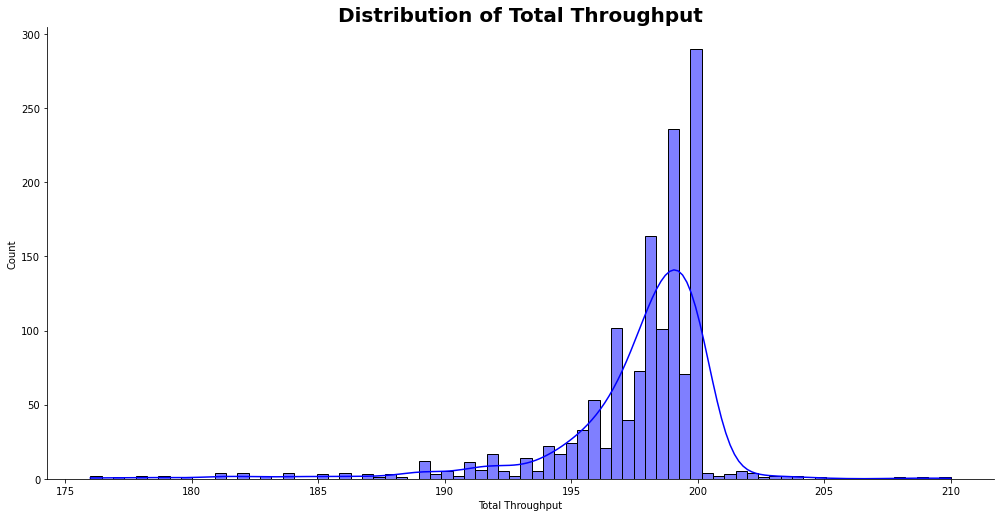

In [94]:
plot_hist(expHandset,'Total Throughput','blue')

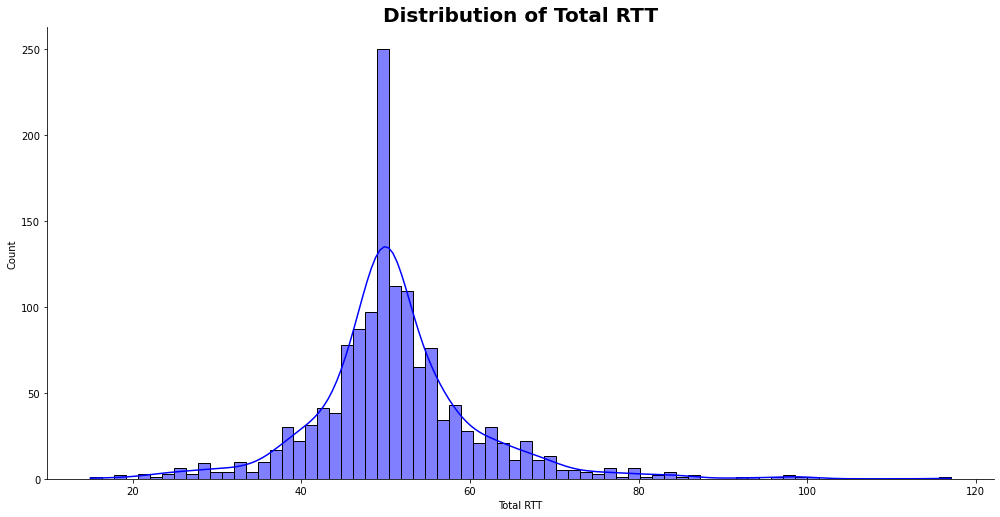

In [95]:
plot_hist(expHandset,'Total RTT','blue')

### KMEANS

In [98]:
from sklearn.preprocessing import Normalizer, MinMaxScaler
from sklearn.cluster import KMeans


def normalizer(df, columns):
    norm = Normalizer()
    return pd.DataFrame(norm.fit_transform(df), columns=columns)

#def scaler(df, columns):
#    minmax_scaler = MinMaxScaler()
#    return pd.DataFrame(minmax_scaler.fit_transform(df), columns=columns)

#def scale_normalize(df,columns ):
#    return normalizer(scaler(df, columns), columns)

In [100]:
dfExp.columns

Index(['Avg TCP', 'Avg RTT', 'Avg Throughput', 'Handset Type'], dtype='object')

In [102]:
dfKm = dfExp[['Avg TCP', 'Avg RTT', 'Avg Throughput']]
dfKmNorm = normalizer(dfKm,['Avg TCP', 'Avg RTT', 'Avg Throughput'])
km = KMeans(n_clusters=3)
km.fit(dfKmNorm)
# Predict the cluster
clust = km.predict(dfKmNorm)

dfKmFV = dfKm.copy()
dfKmFV['Cluster'] = clust
dfKmFV

,Avg TCP,Avg RTT,Avg Throughput,Cluster
MSISDN/Number,,,,
3197020876596.0,1179359.0,50.0,200.0,0
33601001722.0,1179359.0,46.0,200.0,0
33601001754.0,1179359.0,31.0,200.0,2
33601002511.0,1179359.0,50.0,200.0,0
33601007832.0,1179359.0,84.0,200.0,1
...,...,...,...,...
33789967113.0,1179359.0,53.0,200.0,0
33789980299.0,2358718.0,119.0,377.0,0
33789996170.0,1179359.0,52.0,198.0,0


In [110]:
# Function to create scatter plot
def plot_scatter(df,xcol:str,ycol:str,hue='Cluster'):
        plt.figure(figsize=(12, 7))
        sns.scatterplot(data=df,x=xcol,y=ycol,hue=hue)
        plt.title(f'{xcol} VS {ycol}', size=20, fontweight='bold')
        plt.show()

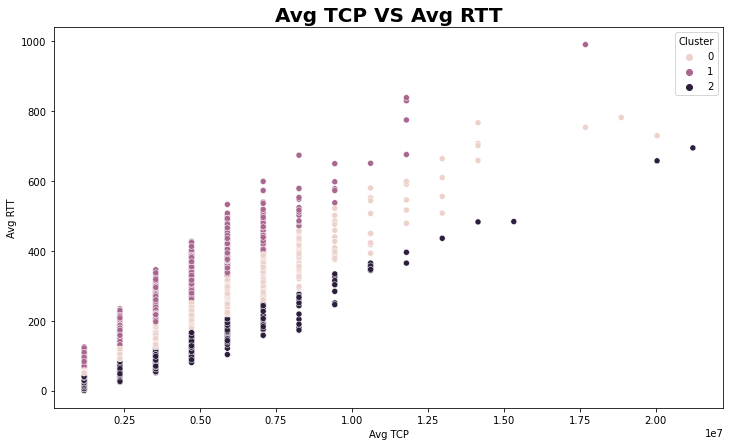

In [111]:
plot_scatter(dfKmFV,'Avg TCP','Avg RTT')